In [1]:
# Import preliminary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Review the data
data = pd.read_csv('datasets/exams.csv')

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [2]:
# Check data  info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
# Check data for missing values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

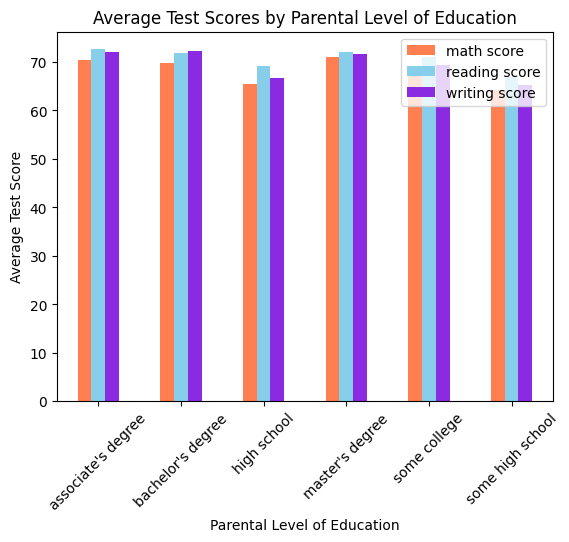

In [4]:
# Visualize the impact of parental level of eduaction on varies test scores
tests = ['math score','reading score','writing score']
grouped_parents = data.groupby('parental level of education')[tests].mean()

# specify the colors for each test
colors = ['coral','skyblue','blueviolet']

# plot the grouped data with custom colors
ax = grouped_parents.plot(kind='bar', color=colors)
ax.set_title('Average Test Scores by Parental Level of Education')
ax.set_xlabel('Parental Level of Education')
ax.set_ylabel('Average Test Score')
plt.xticks(rotation=45)
plt.show()

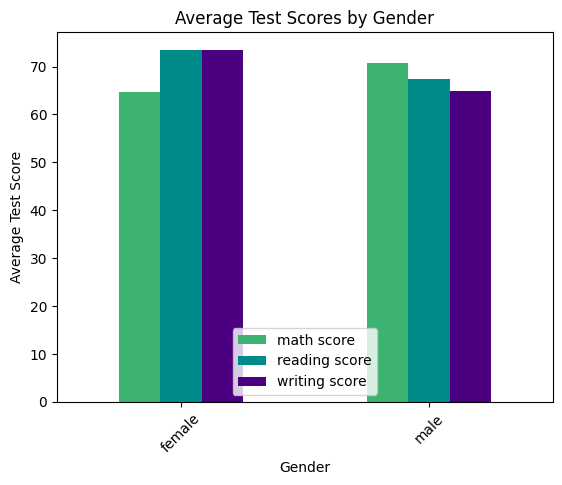

In [5]:
# Visuaize average test scores by genders
tests = ['math score','reading score','writing score']
grouped_gender = data.groupby('gender')[tests].mean()

# specify the colors for each test
colors = ['mediumseagreen','darkcyan','indigo']

# plot the grouped data with custom colors
ax = grouped_gender.plot(kind='bar', color=colors)
ax.set_title('Average Test Scores by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Average Test Score')
plt.xticks(rotation=45)
plt.show()

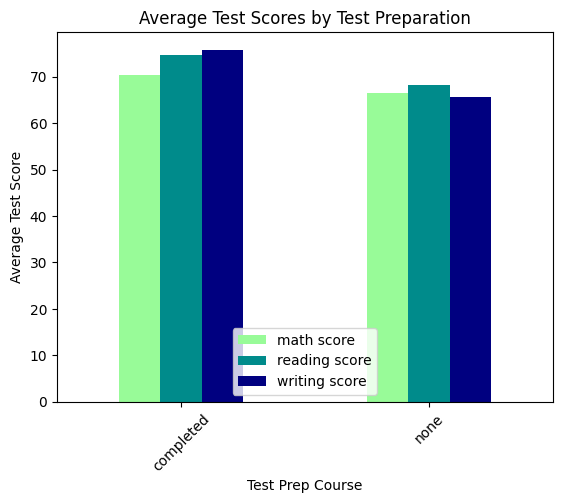

In [6]:
# Visuaize average test scores by genders
tests = ['math score','reading score','writing score']
grouped_test_prep = data.groupby('test preparation course')[tests].mean()

# specify the colors for each test
colors = ['palegreen','darkcyan','navy']

# plot the grouped data with custom colors
ax = grouped_test_prep.plot(kind='bar', color=colors)
ax.set_title('Average Test Scores by Test Preparation')
ax.set_xlabel('Test Prep Course')
ax.set_ylabel('Average Test Score')
plt.xticks(rotation=45)
plt.show()

In [7]:
data[tests].describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


<Axes: >

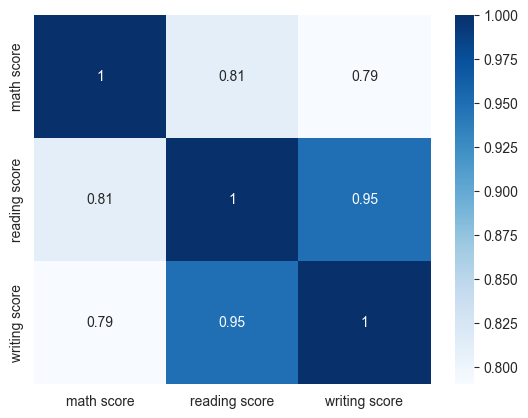

In [16]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot=True,cmap='Blues')

In [9]:
melted = data.melt(id_vars=['gender','race/ethnicity','parental level of education','lunch','test preparation course'],var_name='test score', value_name='grades')

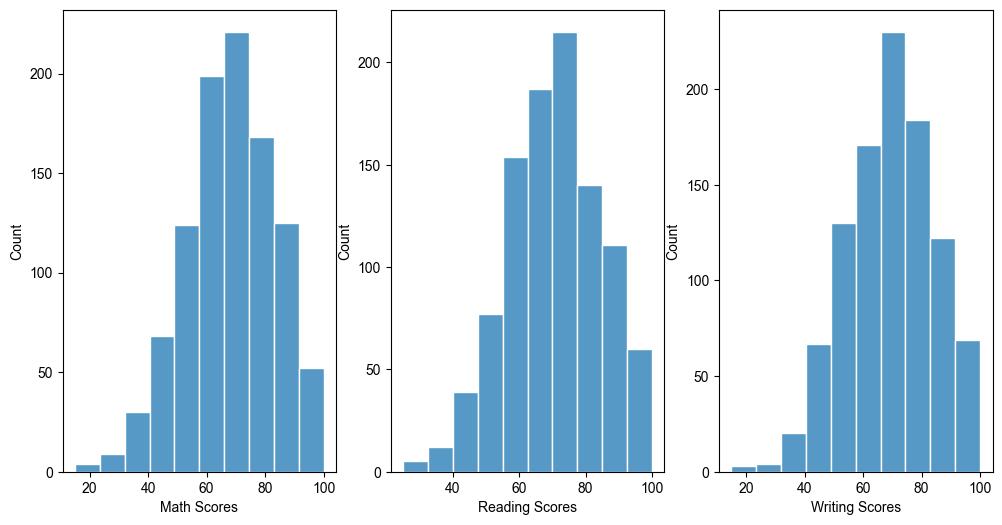

In [10]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3,sharey=False,figsize=(12,6))
palette= 'dark'
sns.set_palette(palette)
sns.set_style('darkgrid')

sns.histplot(data['math score'], ax=ax0,bins=10)
ax0.set(xlabel='Math Scores')

sns.histplot(data['reading score'],ax=ax1,bins=10)
ax1.set(xlabel='Reading Scores')

sns.histplot(data['writing score'], ax=ax2,bins=10)
ax2.set(xlabel='Writing Scores')

plt.show()


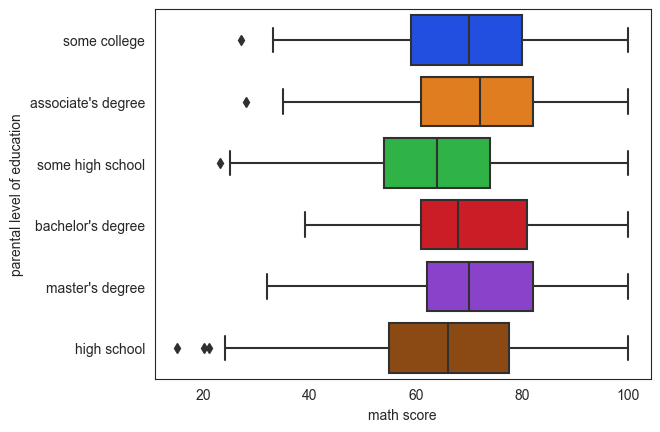

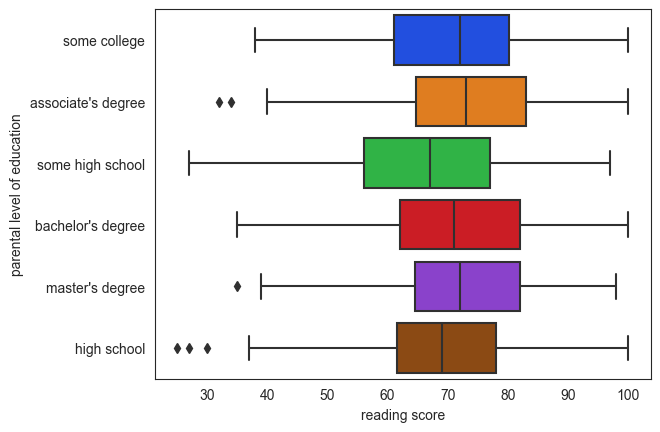

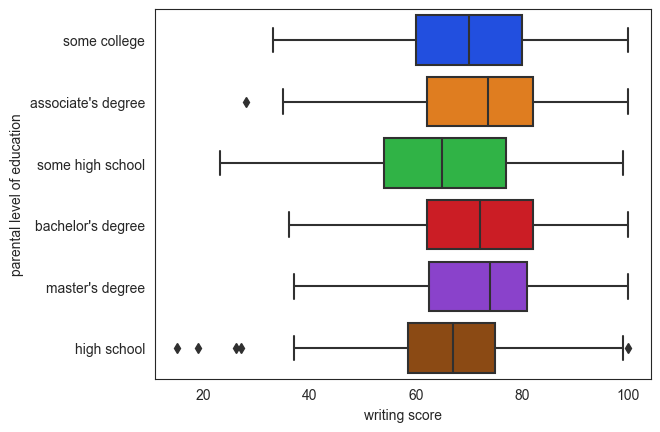

In [11]:
for test in tests:
    sns.set_style('white')
    sns.set_palette('bright')
    sns.boxplot(data=data,
                y='parental level of education',
                x=test)
    plt.show()
    

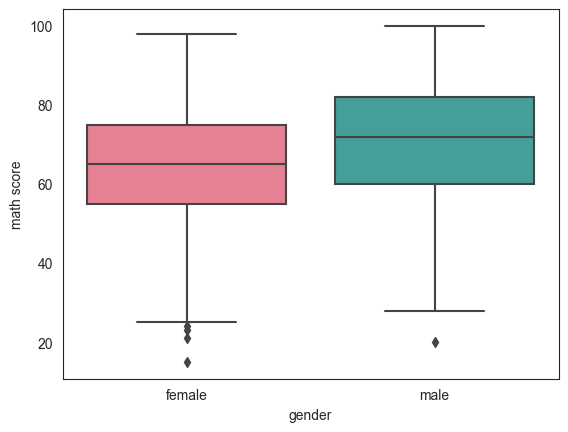

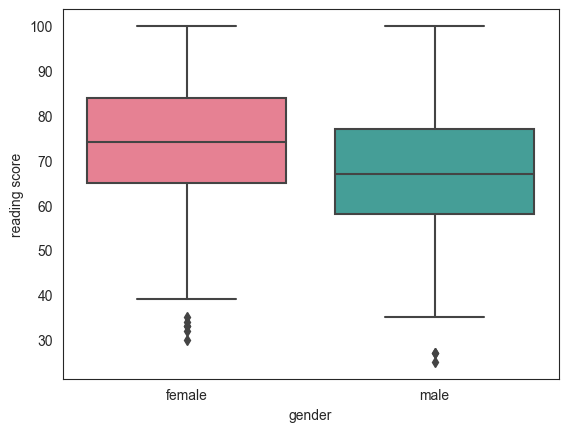

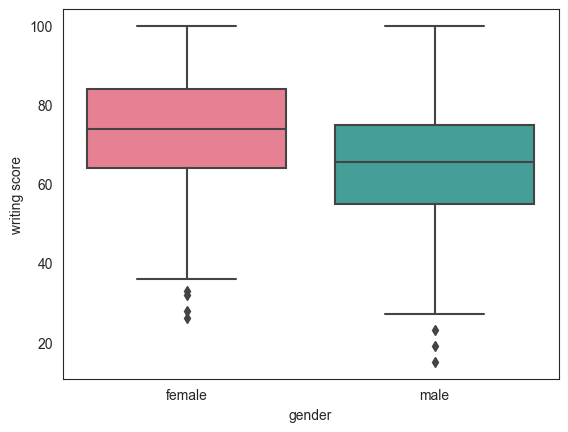

In [12]:
for test in tests:
    sns.set_style('white')
    sns.set_palette('dark')
    sns.boxplot(data=data,
                x='gender',
                y=test,
                palette='husl')
    plt.show()

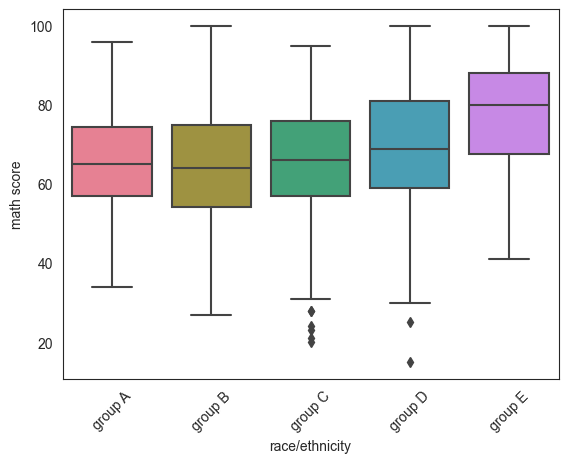

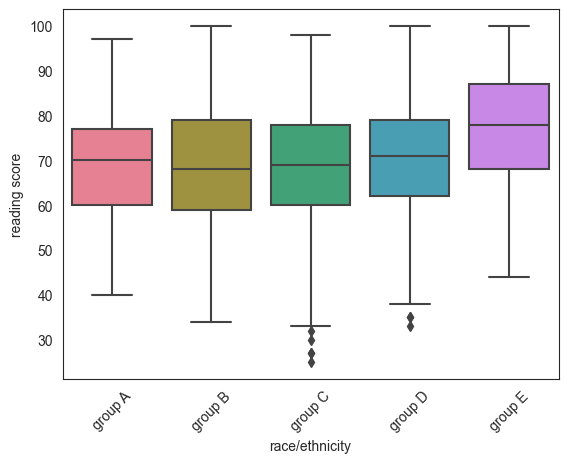

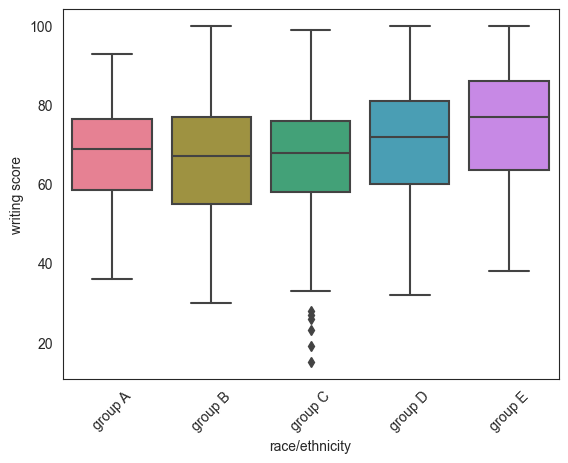

In [13]:
race = ['group A','group B','group C','group D','group E']
for test in tests:
    sns.set_style('white')
    sns.set_palette('dark')
    sns.boxplot(data=data,
                x='race/ethnicity',
                y=test,
                order=race,
                palette = 'husl')
    plt.xticks(rotation=45)
    plt.show()

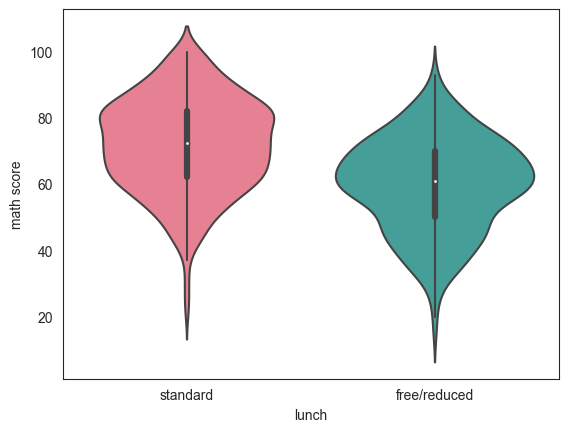

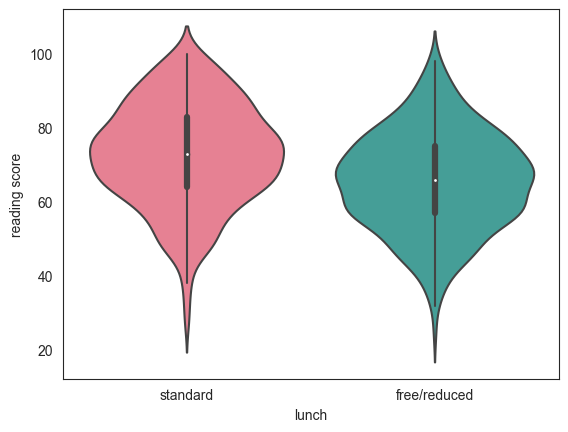

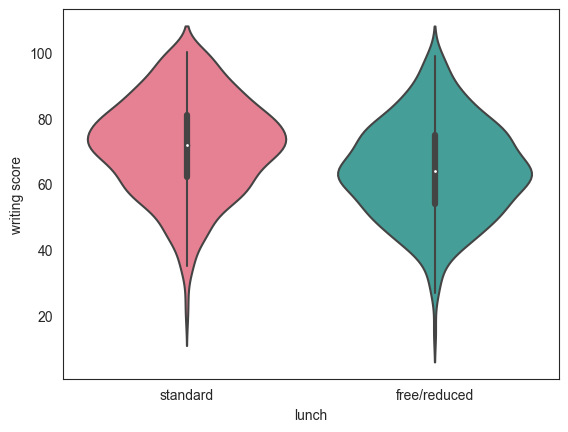

In [14]:
for test in tests:
    sns.set_style('white')
    sns.set_palette('bright')
    sns.violinplot(data=data,
                x='lunch',
                y=test,
                palette='husl')
    plt.xticks(rotation=0)
    plt.show()

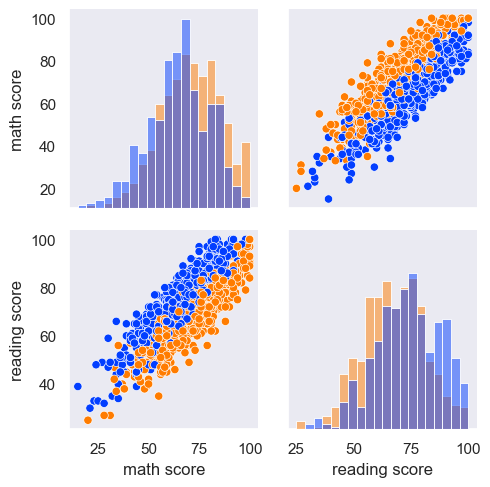

In [30]:
sns.set_context('notebook')
sns.set_style('dark')
sns.set_palette('bright')
g = sns.PairGrid(data,vars=['math score','reading score'],hue='gender')
g1  = g.map_diag(sns.histplot)
g2 = g.map_offdiag(sns.scatterplot)

plt.show()

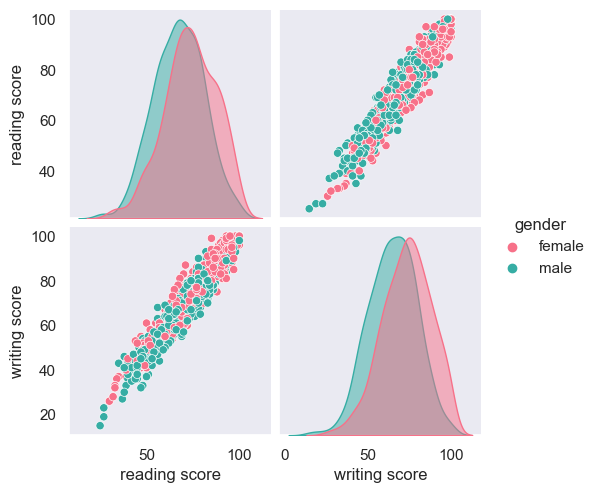

<Figure size 640x480 with 0 Axes>

In [36]:
sns.set_context('notebook')
sns.set_style('dark')
sns.set_palette('bright')
sns.pairplot(data=data,
            vars=['reading score','writing score'],
            kind='scatter',
            hue='gender',
            palette='husl',
            diag_kws={'alpha':0.5})

plt.show()
plt.clf()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1877: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)


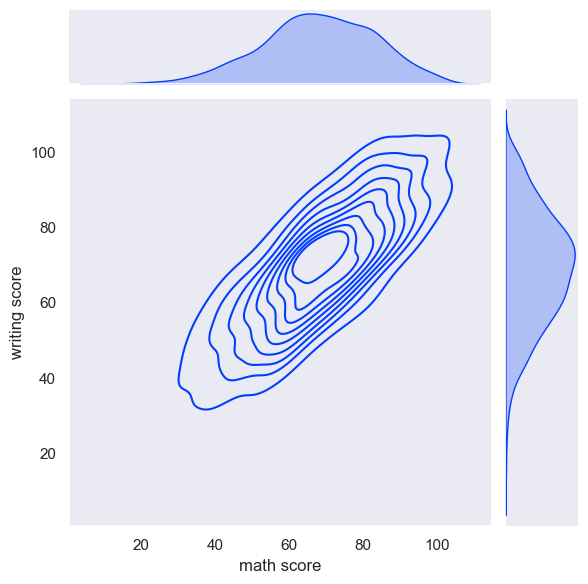

In [39]:
j = sns.JointGrid(data=data, x='math score',y='writing score')
j = j.plot_joint(sns.kdeplot)
j = j.plot_marginals(sns.kdeplot, shade=True)

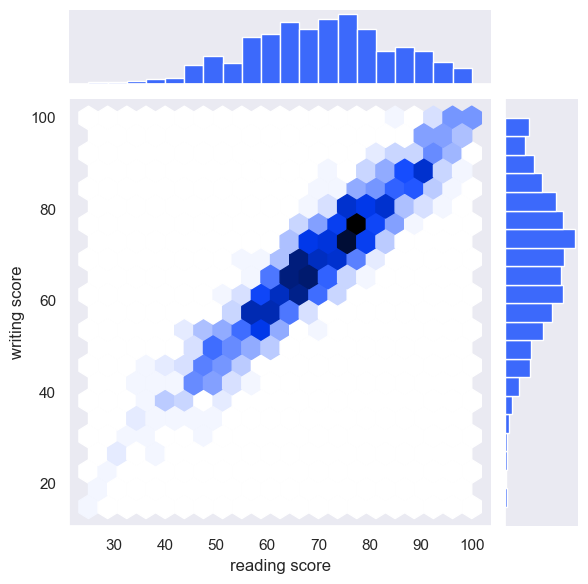

In [41]:
sns.jointplot(data=data,x='reading score',y='writing score',kind='hex')